# 準備

In [1]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, discriminant_analysis,\
                    ensemble, neural_network, inspection
import matplotlib.pyplot as plt
#import pdpbox
from pdpbox import pdp
from pycebox.ice import ice, ice_plot

/usr/local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = mldatasets.load('personality-birthorder', prepare=True)

https://openpsychometrics.org/_rawdata/FBPS-ValidationData.zip downloaded to /root/workspace/src/data/FBPS-ValidationData.zip
/root/workspace/src/data/FBPS-ValidationData.zip uncompressed to /root/workspace/src/data/FBPS-ValidationData
1 dataset files found in /root/workspace/src/data/FBPS-ValidationData folder
parsing /root/workspace/src/data/FBPS-ValidationData/FBPS-ValidationData/FBPS-ValidationData.csv


In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country_AU,country_CA,country_GB,country_IE,country_NZ,country_US,source_undefined,source_google,source_direct,birthorder
3,2,1,3,2,4,3,3,3,3,5,...,0,0,0,0,0,1,1,0,0,1
4,2,1,4,5,2,5,4,4,2,5,...,0,0,0,0,0,1,1,0,0,1
5,5,1,1,3,2,2,4,3,3,5,...,0,0,0,0,0,1,0,1,0,1
6,2,2,3,5,3,2,4,4,5,5,...,0,0,0,0,0,1,0,0,1,1
7,4,5,5,5,3,5,4,4,5,4,...,0,0,0,0,0,1,0,1,0,1


In [4]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country_AU,country_CA,country_GB,country_IE,country_NZ,country_US,source_undefined,source_google,source_direct,birthorder
count,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,...,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000,25813.000000
mean,2.771549,2.404602,3.479642,3.019293,3.008910,2.989230,3.333669,3.617518,3.595746,3.926897,...,0.073684,0.081083,0.085073,0.010072,0.015767,0.734320,0.403789,0.407895,0.188316,1.920389
std,1.389309,1.644840,1.277640,1.413205,1.235201,1.388629,1.240134,1.194782,1.228135,1.261197,...,0.261261,0.272968,0.278996,0.099857,0.124576,0.441703,0.490666,0.491453,0.390972,0.870363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25813 entries, 3 to 41840
Data columns (total 97 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Q1                25813 non-null  int64
 1   Q2                25813 non-null  int64
 2   Q3                25813 non-null  int64
 3   Q4                25813 non-null  int64
 4   Q5                25813 non-null  int64
 5   Q6                25813 non-null  int64
 6   Q7                25813 non-null  int64
 7   Q8                25813 non-null  int64
 8   Q9                25813 non-null  int64
 9   Q10               25813 non-null  int64
 10  Q11               25813 non-null  int64
 11  Q12               25813 non-null  int64
 12  Q13               25813 non-null  int64
 13  Q14               25813 non-null  int64
 14  Q15               25813 non-null  int64
 15  Q16               25813 non-null  int64
 16  Q17               25813 non-null  int64
 17  Q18               25813 non-nul

In [6]:
rand=9
y=df['birthorder']
X=df.drop(['birthorder'],axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand)

# 特徴量が結果に与える影響を測定する
この演習では、学習用データを決定木、勾配ブースティング木、ランダムフォレスト、ロジスティック回帰、多層パーセプトロン、線形判別分析で学習する。


In [7]:
class_models = {
    #Tree
    'decision_tree':{
        'model':tree.DecisionTreeClassifier(max_depth=6, random_state=rand, class_weight='balanced')
    },
    #Emsemble Methods
    'gradient_boosting':{
        'model':ensemble.GradientBoostingClassifier(n_estimators=200, max_depth=4, subsample=0.5, learning_rate=0.05)
    },
    'random_forest':{
        'model':ensemble.RandomForestClassifier(max_depth=11, n_estimators=300, max_features='sqrt', random_state=rand)
    },
    #Generalized Linear Models(GLMs)
    'logistic':{
        'model':linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs', class_weight='balanced', max_iter=500)
    },
    #Discriminant Analysis
    'lda':{
        'model':discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
    },
    #Neurak Netwworks
    'mlp':{
        'model':make_pipeline(StandardScaler(), neural_network.MLPClassifier(hidden_layer_sizes=(11,), \
                                                                             early_stopping=True, random_state=rand,\
                                                                             validation_fraction=0.25, max_iter=500))
    }
}


In [8]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train,y_train)
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train, y_train_pred)
    class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test, y_test_pred)
    class_models[model_name]['Recall_train'] =\
    metrics.recall_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Recall_test'] =\
    metrics.recall_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['Precision_train'] =\
    metrics.precision_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Precision_test'] =\
    metrics.precision_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['F1_test'] =\
    metrics.f1_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['MCC_test'] =\
    metrics.matthews_corrcoef(y_test, y_test_pred)

In [9]:
class_metrics = pd.DataFrame.\
    from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                      'Recall_train', 'Recall_test',\
                                      'Precision_train', 'Precision_test',\
                                      'F1_test', 'MCC_test']]
with pd.option_context('display.precision', 3):
    html = class_metrics.sort_values(by='MCC_test', ascending=False).style.\
        background_gradient(cmap='plasma', low=0.43, high=0.63,\
                            subset=['Accuracy_train', 'Accuracy_test']).\
        background_gradient(cmap='viridis', low=0.63, high=0.43,
                            subset=['F1_test'])
html

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_test,MCC_test
decision_tree,0.497,0.464,0.497,0.464,0.541,0.494,0.441,0.246
gradient_boosting,0.626,0.496,0.626,0.496,0.636,0.492,0.484,0.233
logistic,0.497,0.493,0.497,0.493,0.499,0.495,0.492,0.232
mlp,0.522,0.494,0.522,0.494,0.517,0.485,0.480,0.223
lda,0.501,0.492,0.501,0.492,0.500,0.489,0.477,0.201
random_forest,0.912,0.484,0.912,0.484,0.921,0.478,0.447,0.198


今回、偽陰性と偽陽性どちらかを優先することはしないため、適合率と再現率は同等の価値である。だいたい全てのモデルで似た値だが、決定木のみ適合率と再現率に差がある。F1スコアは適合率と再現率の調和平均であるため、だいたいのモデルで似た値になっているが、決定木のみ値が異なっている。

注意点として、テストデータと学習データのサイズの差が大きいことから、モデルがどれだけ過学習しているかがわかる。勾配ブースティングやランダムフォレストのように、過学習しないようにテストの精度をあげることは難しいことがわかる。

> 勾配ブースティング
> ランダムフォレスト

### MCC

### No Information Rate(Null error rate)
分類問題で、正解ラベルに偏りがあるときに、多くあるラベルのほうだけを予測すればよい精度がでてしまう。例えば、犬の画像が85%を占めていて、15%が猫であるようなとき、85%以上の精度を出す必要がある。

NIRを計算するには、多い方のクラスの数を、データ数で割ることで求められる。

In [10]:
print('NIR: %.4f'%(y_train[y_train==1].shape[0]/y_train.shape[0]))

NIR: 0.4215


## ツリーベースのモデルの重要度
ツリーベースモデルの重要度には
+ split frequency
+ gini(gain) importances
+ permutation importances
がある。

よく使われるのがジニ不純度を使って計算されている。

In [11]:
dt_imp_df = pd.DataFrame(
    {
        'name':X_train.columns,
        'dt_imp':class_models['decision_tree']['fitted'].feature_importances_
    }
    )
gb_imp_df = pd.DataFrame(
    {
        'name': X_train.columns,
        'gb_imp':class_models['gradient_boosting']['fitted'].feature_importances_
    }
    )
rf_imp_df = pd.DataFrame(
    {
        'name':X_train.columns,
        'rf_imp':class_models['random_forest']['fitted'].feature_importances_
    }
    )

３つのモデルはそれぞれ構造が違うため、Feature Importanceは同じスケールではない。相対的な尺度と見るのが良い。ソートしてみていく。

In [12]:
dt_rank_df = pd.DataFrame({'dt_rank': dt_imp_df['dt_imp'].rank(method='first',ascending=False).astype(int)})
gb_rank_df = pd.DataFrame({'gb_rank': gb_imp_df['gb_imp'].rank(method='first',ascending=False).astype(int)})
rf_rank_df = pd.DataFrame({'rf_rank': rf_imp_df['rf_imp'].rank(method='first',ascending=False).astype(int)})

上記のランク付けしたDataFrameを連結する。平均のランクもだした。

In [13]:
tree_ranks_df = pd.merge(
        pd.merge(
            pd.concat((dt_imp_df, dt_rank_df), axis=1),
            pd.concat((gb_imp_df, gb_rank_df), axis=1),
            'left'
        ),
    pd.concat((rf_imp_df, rf_rank_df),axis=1),
    'left'
    )
tree_ranks_df['avg_rank'] = (
    tree_ranks_df['dt_rank']+tree_ranks_df['gb_rank']+tree_ranks_df['rf_rank']/3
)
tree_ranks_df.sort_values(by='avg_rank')

,name,dt_imp,dt_rank,gb_imp,gb_rank,rf_imp,rf_rank,avg_rank
28,birthn,0.851533,1,0.370634,1,0.196067,1,2.333333
81,testelapse,0.013708,3,0.037108,2,0.027307,2,5.666667
0,Q1,0.025340,2,0.024619,6,0.016135,6,10.000000
26,age,0.006679,7,0.029060,4,0.025065,3,12.000000
80,introelapse,0.005056,9,0.031822,3,0.022142,5,13.666667
...,...,...,...,...,...,...,...,...
94,source_google,0.000000,95,0.001427,90,0.003204,82,212.333333
83,gender_undefined,0.000000,87,0.000849,94,0.000241,96,213.000000
91,country_NZ,0.000000,92,0.001096,92,0.000690,93,215.000000
93,source_undefined,0.000000,94,0.000903,93,0.003050,85,215.333333


ここからわかるように、3つのモデルでのランクで類似点がある。一応重要度は相対的に見るべきで、例えば最小-最大スケールにすることもできる。しかし、それをすると特徴量間の順序は曖昧になって、代わりに距離がわかるのでどちらが良いかは場合による。

ジニ不純度を用いたFeature Importanceはモデル固有である。そのため、ジニ不純度によりカーディナリティが高い特徴量に偏ってしまう。カーディナリティが高い特徴量とは、より多くのユニークな値を持つ特徴量のこと。
> カーディナリティとは、数学で基数あるいは濃度という意味の用語。ITの分野では、リレーショナルデータベースにおいてあるテーブルの同一の列（カラム）に含まれる異なる値の数（バリエーション）のことを指すことが多い。

この例では、72種類の年齢がデータセットに表現されているが、すべての質問で5つから6つのユニークな値を持っているし、country_GBやgender_undefinedなどはすべてバイナリでユニークな値は2つ。平均ランクを見ると年齢はどの質問よりも重要であるはず。しかし、ジニ不純度によるカーディナリティを考慮する必要がある。

## ロジスティック回帰のFeature Importance
前の章で、ロジスティック回帰のFeature Importanceについて学んだ。ロジスティック回帰モデルには係数があり、係数がどの特徴量がより重要か考えるのに役立つ可能性があった。

係数のプロパティを確認すると、

In [14]:
print(class_models['logistic']['fitted'].coef_.shape)

(3, 96)


係数のセットが3つあることがわかる。モデル定義では`multi_class='ovr'`としている。ovrは**One vs Rest**の略である。

--------

### 多クラス分類
**参考文献 : PRML p180**

K>2クラスの分類では一対一分類器(one-versus-one classifier)と、一対他分類器(one-versus-the-rest classifier)である。
#### 一対他分類器(one-versus-the-rest classifier)
多くの2クラス識別関数を組み合わせることで、Kクラスの識別を構成できる。この２クラス識別関数の組み合わせによるKクラスの識別には、いくつかの問題点がある。

Kクラスを分類するのにある特定のクラス$C_k$に入る点とそのクラスに入らない点とに分類する２クラス問題を解く分類器をK-1個利用することを考える。図4.2の左側の例は、３クラス分類において一対他分類器によって曖昧な分類領域が生じてしまう例である。

#### 一対一分類器(one-versus-one classifier)

------------------------
第２章でのべたように係数は対数オッズである。この例では各クラスの予測に対応する3セットの係数がある。1番上の子、真ん中の子、下の子に対しての対数オッズがある。つまり、係数の1番最初のセットは、1番上の子についての対数オッズである。

モデルを学習する際にデータを正規化させなかったので、すべての特徴量のスケールが異なる。これは、各係数の標準偏差をかけて、Feature Importanceを計算すれば確認できる。

> 第３章でこれが単なる近侍であり、ロジスティック回帰のFeature Importanceを得る最も良い方法についてコンセンサスがないことについて述べた。述べたっけ？




In [15]:
stdv = np.std(X_train, 0)
print(stdv)

Q1                  1.389059
Q2                  1.645557
Q3                  1.283712
Q4                  1.408935
Q5                  1.239410
                      ...   
country_NZ          0.123290
country_US          0.439408
source_undefined    0.490334
source_google       0.491965
source_direct       0.390005
Length: 96, dtype: float64


In [16]:
lr_imp_df = pd.DataFrame({
    'name':X_train.columns,
    'first_coef_norm':class_models['logistic']['fitted'].coef_[0]*stdv,
    'middle_coef_norm':class_models['logistic']['fitted'].coef_[1]*stdv,
    'last_coef_norm':class_models['logistic']['fitted'].coef_[2]*stdv
}).reset_index(drop=True)

各特徴量がモデルに与える影響の大きさを、データセットで表される各かクラスの量である事前分布と比較検討できる。LDAモデルではこれを`priors_`属性と保存されている。

In [17]:
class_priors = class_models['lda']['fitted'].priors_
print(class_priors)

[0.42147566 0.23701862 0.34150572]


1番上の子は全体の4割を占めていて、真ん中の子は２割、1番下は３割だとわかる。これを使い、係数を絶対値でとって加重平均を作成する。
> 対数オッズの増加減少でなく、絶対値に興味があるため。そうなの？

In [18]:
lr_imp_df['coef_weighted_avg']=(abs(lr_imp_df['first_coef_norm'])*class_priors[0])+\
    (abs(lr_imp_df['middle_coef_norm'])*class_priors[1])+\
    (abs(lr_imp_df['last_coef_norm'])*class_priors[2])

ソートしてみる。

In [19]:
lr_imp_df.\
    sort_values(by='coef_weighted_avg', ascending=False).style.background_gradient(
    cmap='viridis',
    low=-0.1,
    high=0.1,
    subset=['first_coef_norm','middle_coef_norm','last_coef_norm']
)

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.413309,1.354105,-0.406107,0.633836
0,Q1,0.110574,0.022402,-0.148970,0.102788
12,Q13,0.079400,-0.038329,-0.063662,0.064291
15,Q16,0.060201,-0.054046,-0.027486,0.047570
19,Q20,-0.060959,0.050876,0.022687,0.045499
1,Q2,0.019349,-0.080859,0.048747,0.043968
9,Q10,0.049696,-0.018842,-0.045734,0.041030
26,age,0.055277,-0.026190,-0.029190,0.039474
39,EST1,0.049843,-0.062254,-0.002945,0.036769
40,EST2,-0.051427,-0.005717,0.039441,0.036500


+ birthnは1番上の子と負の相関関係がある。これは直感的に正しい(家族が多ければ1番上の子である可能性が低い)。
+ 上と同じことを1番下の子にいえる。
+ 家族の数が増えれば真ん中の子である可能性が増えるのも直感的に正しい。
+ 年齢があがるにつれて1番下の子である可能性は低くなるのは一昔前は大家族が多かったので直感的であるが、1番上の子と正の相関があるのは明らかではない。そうか？

他には、
+ 質問１の「たくさん本を読んだ」と質問13の「周りの人を上司にする」でYesと答えると1番上の子である可能性が高くなっている。
+ 質問20の「他人の褒め言葉は必要ない」では真ん中の子が強い。

別々に学習しているにも限らず、各クラスはほとんど反対になっていることがわかる。３つのクラス全てで正であったり負であるようなケースがほとんどない。

決定木固有のFeature Importanceは、全てのクラスについて全てのFeature Importanceを総合的に判断するにはあまり信頼性が高くない(個々で予測しているので)。また、モデルがロジスティック回帰であるために成立しないといけない仮定が多い。もしこの仮定をクリアできていると、OvRロジスティック回帰ではクラス間を分離してみるために、各特徴量が各クラスにどれくらい関係しているかを独立して調べられるのは利点である。

## LDAのFeature Importance


### LDA(線形判別分析)
**PRML : p185**

LDA(Linear Discriminant Analysis)はいくつかの仮定を持っている。次元削減と一緒。クラス間の分散を大きく、クラス内の分散は小さくするような関数を考えて、決定境界を引くことでクラス判別を行う。  
線形判別分析では、適当な線形変換によってデータを直線ｚ上に写像し、２つのクラスに判別している。線形判別分析はこの射影先の直線ｚを見つけるための手法の１つ。

![](https://cdn.discordapp.com/attachments/633986787529981975/954663883832967178/unknown.png)

以下の式で１次元に射影する。  
$$y_n = {w}^T {x}_n$$
一般的に１次元への射影は相当量の情報の損失を発生させる。重みベクトル $w$ を調整することで、クラスの分離を最大にする射影を選択する。以下のようなデータ $c_1,c_2$を考える。
![](https://cdn.discordapp.com/attachments/633986787529981975/954669309169381426/unknown.png)  
クラス $c_1$ のデータ数が $N_1$ 、クラス $c_1$ のデータ数が $N_2$ ある。この２つのクラスの平均ベクトルは、  
$$m_1 = \frac{1}{N_1}\sum_{n \in C_1}{x_n},\quad m_2=\frac{1}{N_2}\sum_{n\in C_2}{x_n}$$
で得られる。この $m_1, m_2$ を各クラスの代表値として、この２点が線形変換ベクトル $w$ によって射影されたときに最も離れるようにする。  
$w$ 上へ射影された際のクラス分離度の測定するには、射影されたクラスの平均の分離度を見ればよい。  
$${w}^T m_1 - {w}^T m_2 = {w}^T(m_1 - m_2) \\
m_k = {w}^T {m}_k$$  
これが最大になるように $w$を決定する。ただし、この式は$w$を大きくすればするほどいくらでも大きな値にできてしまう。これを避けるために、$w$は単位長であるという制約を加える。つまり、  
$$
|w|=1 \\
\sum_{i}w_i^2 = 1
$$
> なんで二乗？

とする。制約付き最大化問題と見ると、ラグランジュ乗数を使えるので、  
$$
w\propto (m_1 - m_2)
$$
と求められる。

これは、$w$が各クラスの平均値を結ぶ線分と平行になることを意味する。実際にベクトル$w$から決定境界の直線を引くと、決定境界の直線は$w$に直行し、各クラスの平均を結ぶ線分の中点を通る直線になっているため、以下のようになる。
![](https://cdn.discordapp.com/attachments/633986787529981975/954817318318383204/unknown.png)  
$c_1$の青い点が決定境界の直線上にあり、これだけではまだ足りない。
> PRMLでは、「クラス分布の非対角な共分散が強いために起こる問題である。」と書いてある。よくわからない。

各クラスの平均値だけをみているとうまく判別することができない。例えば、$c_1$の青い点が$c_2$の赤い点が密集している位置に混ざっていても、一方で$c_2$から遠く離れた位置にたくさんの青い点が存在すれば、平均的には２つのクラスは離れているとみなされてしまう。つまり、各クラスの点のばらつきが大きいと、平均的な位置が離れていても適切な決定境界を引くことができない。
そこで、クラスの平均値のみでなく、射影されたクラス平均間の分離度を大きくすると同時に、各クラス内では小さな分散を与える関数を最大化することで、これを解消する。

射影後の各クラス内の分散を数式で表すと、クラス$C_k$から射影されたデータのクラス内分散は、
$$
s_k^2 = \sum_{n \in C_k}(y_n - m_k)^2
$$
で与えられる。ここで、$y_n = w^T x_n$であり、$m_k = w^T m_k$であることから、クラスが２つの場合、
$$
s_1^2 = \sum_{n \in C_1} (w^T x_n - w^T m_1)^2 \\
s_2^2 = \sum_{n \in C_2} (w^T x_n - w^T m_2)^2
$$
となる。したがって、総クラス内分散を次のように定義する。
$$
s^2 = s_1^2 + s_2^2
$$
フィッシャーの判別規準はクラス内分散とクラス間分散の比で定義され、
$$
J(w) = \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}
$$
で与えられる。分子はクラス間の分離度の平均であるが、分母が総クラス内分散であるために、分子も分散の形で表している。

### Feature Importance
OvRのロジスティック回帰と同様に、LDAでも3セットの係数を抽出できる。

In [20]:
print(class_models['lda']['fitted'].coef_.shape)

(3, 96)


各特徴量がクラスの分離可能性にどの程度の重みがあるかを教えてくれる。係数の絶対値が高いほど、その特徴量がクラスの分離に役立っている。LDAはPCAに似ているが、相関ではなく、分散でみる。

In [21]:
lda_imp_df = pd.DataFrame({
    'name':X_train.columns,
    'first_coef_norm':class_models['lda']['fitted'].coef_[0]*stdv,
    'middle_coef_norm':class_models['lda']['fitted'].coef_[1]*stdv,
    'last_coef_norm':class_models['lda']['fitted'].coef_[2]*stdv
}).reset_index(drop=True)

In [22]:
lda_imp_df['coef_weighted_avg']=(abs(lda_imp_df['first_coef_norm'])*class_priors[0])+\
    (abs(lda_imp_df['middle_coef_norm'])*class_priors[1])+\
    (abs(lda_imp_df['last_coef_norm'])*class_priors[2])

In [23]:
lda_imp_df.sort_values(by='coef_weighted_avg',ascending=False).style.background_gradient(
    cmap='viridis',
    low=-0.1,
    high=0.1,
    subset=['first_coef_norm','middle_coef_norm','last_coef_norm']
)

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.315051,1.002922,-0.307242,0.475423
0,Q1,0.090613,-0.012808,-0.102942,0.076382
12,Q13,0.056740,-0.033932,-0.046477,0.047829
51,AGR3,-0.039195,-0.005623,0.052276,0.035705
15,Q16,0.038815,-0.035811,-0.023050,0.032719
6,Q7,-0.004032,0.064381,-0.039707,0.030519
16,Q17,0.035050,-0.009894,-0.036390,0.029545
24,Q25,-0.034672,0.034036,0.019169,0.029227
77,OPN9,-0.033481,0.045381,0.009825,0.028223
19,Q20,-0.030615,0.038022,0.011395,0.025807


ロジスティック回帰のトップ10とだいぶ被っている。クラス間で同様のパターンが見られる。例えば、真ん中の子が他のクラスよりもbirthnと正の相関がある一方で、他の２クラスは同じくらいの値になっている。ロジスティック回帰のときと一緒。

LDAのFeature Importanceは、モデル固有であるという点と、いくつかの仮定が必要とである。多重共線性は想定しない（ガウス分布である）。利点としては、各特徴量が各クラスにどのように影響しているのか見える。ただ、LDAは仮定違反にロバスト(強い)ので、多少ノイズ多くてもいける。ただその場合は**二次判別分析(QDA)**(PRML p196)のほうが優れている。QDAは正規性の仮定を行わず、ガウス分布を仮定して、線形でなく2次の決定境界でクラス分類する。　

> なんでLDAは仮定違反にロバストなんだろう

> QDAについてここまとめたい

## 多層パーセプトロンのFeature Importance
NNにはFeature Importanceを判断できるような既存の属性はない。

各レイヤーに対応する重み行列が2セットあり、単一の隠れ層でも複雑である。

In [24]:
print(class_models['mlp']['fitted'][1].coefs_[0].shape)
print(class_models['mlp']['fitted'][1].coefs_[1].shape)

(96, 11)
(11, 3)


各行列の重みは当然相互に増幅、減衰する可能性があり、これは誤解にもつながる。(96,11)と(11,3)だから内積とって(96,3)にもできるけど、これは順伝播で予測に使われる重みじゃない。また、途中で使われてる活性化関数も考慮していない。いろいろ手法があるが、活性化関数の影響を無視したものである。

つまり、NNの固有のパラメータからFeature Importanceを抽出するような方法はコンセンサスがない。本の後半でやる。

ここまでいろいろなモデル固有のパラメータを使ってそれぞれFeature Importanceを計算した。しかし、方法には一貫性がなかった。そのためモデルの違いだけでなく、方法によっても結果が異なっていた。任意のモデルで使用できるFeature Importanceを計算できる信頼できる方法であるPFIを説明していく。

# PFI(Permutation Feature Importance)

## Permutation Importance
Permutation Importance(https://arxiv.org/abs/1801.01489 ) では、ある特徴量がどれだけモデルの予測精度向上に寄与しているか計算する。

この重要度を測るために、Permutationと呼ばれる手法を使う。ある特徴量をランダムに並べ変えると、その特徴量は意味のない特徴量となりモデルに寄与しなくなる。その状態で学習したモデルの精度を測り、元のモデル精度と比べることで、変化した誤差分だけモデルに寄与していたと言える。
そしてランダム化した特徴量で作ったモデルの誤差を、もともとのモデルの誤差で割ったものがPermutation Importanceである。

元のモチベーションは、あるモデルでFeature Importanceを見ても、他のモデルでは違うことを言っていて困るということ(羅生門効果)。モデルに依存しない特徴量重要度を提案し、モデル信頼度とした。

## PFIを使用する
PFIはモデル固有でない方法なので、テストデータセットなどの見えないデータで使用できる。過学習してしまったモデルでの特徴量重要度はあまり信頼できないことはすぐわかる。けれど、テストデータを導入した時の特徴量重要度はどの程度信頼できるのか測ることはできない。PFIを使用すれば、テストデータなどでも特徴量重要度について考えることができる。

PFIは特徴量を複数回シャッフルしてから、誤差を平均で出す。再現性のために`random_state`は固定しておく。`n_jobs=-1`で並列処理を行う。

In [25]:
for model_name in class_models.keys():
    fitted_model =class_models[model_name]['fitted']
    permutation_imp = inspection.permutation_importance(
        fitted_model, X_test, y_test, n_jobs=-1, scoring='accuracy', n_repeats=8, random_state=rand
    )
    class_models[model_name]['importances_mean']=permutation_imp.importances_mean

In [26]:
perm_imp_df = pd.DataFrame({
    'name': X_train.columns,
    'dt_imp': class_models['decision_tree']['importances_mean'],
    'gb_imp': class_models['gradient_boosting']['importances_mean'],
    'rf_imp': class_models['random_forest']['importances_mean'],
    'log_imp': class_models['logistic']['importances_mean'],
    'lda_imp': class_models['lda']['importances_mean'],
    'mlp_imp': class_models['mlp']['importances_mean']
}).reset_index(drop=True)

In [27]:
perm_imp_df['avg_imp'] = (perm_imp_df['dt_imp']+\
                         perm_imp_df['gb_imp']+ perm_imp_df['rf_imp']+\
                         perm_imp_df['log_imp']+ perm_imp_df['lda_imp']+ \
                         perm_imp_df['mlp_imp'])/5

In [28]:
perm_imp_sorted_df = perm_imp_df.round(5).sort_values(by='avg_imp', ascending=False)
perm_imp_sorted_df.style.background_gradient(cmap='viridis_r', low=0, high=0.2,\
                                            subset=['dt_imp', 'gb_imp', 'rf_imp','log_imp', 'lda_imp', 'mlp_imp'])

,name,dt_imp,gb_imp,rf_imp,log_imp,lda_imp,mlp_imp,avg_imp
28,birthn,0.138500,0.109020,0.074610,0.113480,0.083300,0.109310,0.125650
0,Q1,0.008320,0.006660,0.000880,0.008970,0.011400,0.008230,0.008890
12,Q13,0.000980,0.002740,0.001670,0.000750,0.004270,0.002830,0.002650
3,Q4,0.000000,0.002200,0.002050,0.002070,0.000900,0.002820,0.002010
51,AGR3,0.000320,0.001500,0.000810,0.001190,0.003100,0.002950,0.001970
26,age,0.001070,0.001130,0.004110,0.001480,-0.000820,0.001580,0.001710
59,CSN1,0.000000,0.001850,0.001350,0.001610,0.000030,0.002860,0.001540
14,Q15,0.000000,0.001000,0.001980,0.001970,0.000760,0.001230,0.001390
19,Q20,0.000000,0.002690,0.000470,0.001610,0.001160,0.001010,0.001390
63,CSN5,0.002040,0.000840,0.000130,0.001450,0.000920,0.001530,0.001380


PFIをみると、`birthn`が大きく依存していることがわかる。次に重要視されている`Q1`と大きく差をつけて依存していることがわかる。この値は予測誤差が平均してどのくらい増えているかの値なので、これを各モデルのテスト精度から差し引いてみる。

In [29]:
perm_imp_sorted_df.iloc[0,1:7]

dt_imp      0.1385
gb_imp     0.10902
rf_imp     0.07461
log_imp    0.11348
lda_imp     0.0833
mlp_imp    0.10931
Name: 28, dtype: object

In [30]:
pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_test']]-\
    perm_imp_sorted_df.iloc[0,1:7].to_numpy().reshape((6,1))

,Accuracy_test
decision_tree,0.325639
gradient_boosting,0.3874
random_forest,0.409015
logistic,0.380005
lda,0.408777
mlp,0.385114


これをみると、`birthn`のPFIをひくと単一のモデルの精度がNIR(0.4215)を越えられていないことがわかる。多重共線性(説明変数同士で相関がある)を無視すると、`birthn`は他の質問をすべて合わせても予測には不十分であることを示している。質問作った側からしたら、モデルの精度をあげるために作った質問なのでこれは想定外であろうなぁ。

モデルの解釈には、どの特徴量がモデル精度に寄与するのかしないのかを理解する以上のことがある。モデルが間違った理由で機能しているときでも、なぜ`birthn`がうまくいくのか、残りの特徴量から何が学べるのかをもっと理解するべきである。

## PFI のデメリット
多重共線性を考慮できていないこと。１つの特徴量をシャッフルすると、それと相関関係のある特徴量はシャッフルされていないので、エラーは比較的変化しない。つまり、相関関係のある特徴量の重要度は本来よりも低くなる。(多重共線性は特徴量重要度よりも優先される)

# PDP(Partial Dependence Plot)の解釈
PDPは可能なすべての予測に対する特徴量の小さい影響をみる。特徴量の影響と目的変数の関係の性質(線形、指数、単調など)を視覚的に示すことができるグローバルモデル解釈方法である。

線形モデルは係数を見れば、説明変数をどう変化させれば目的関数がどう変化するのかわかるが、決定木アルゴリズムでは変数重要度はわかってもそれがわからない。そういうときに使える。

$f$は機械学習モデル、$x_S$は目的変数との関係を確認したい説明変数(通常１つか２つ)、$x_C$はそれ以外の説明変数を表している。$x_s$と$x_C$を組み合わせて、特徴空間$x$を構成する。回帰のとき、PDPは以下のように定義される。
$$
\hat{f}_{x_S} (x_S) = E_{x_C} \left[ \hat{f}(x_S, x_C) \right] = \int \hat{f} (x_S, x_C) d P(x_C)
$$
PDPでは、集合$C$の特徴量の分布に対して機械学習モデルの出力を周辺化することで機能する。これによって、この関数は集合$S$の関心のある特徴量と予測結果との関係を示すことができる。他の特徴量を周辺化することで、Sの特徴量にのみ依存する関数を得ることができ、他の特徴量との交互作用も含まれる。交互作用は2つの因子が組み合わさることで初めて現れる相乗効果のことです。

Partial Dependenceと別に、Partial function$\hat{f}_{x_S}$というのがある。これは学習データの平均として計算される。モンテカルロ法として知られている。
$$
\hat{f}_{x_S}(x_S)=\frac{1}{n}\sum_{i=1}^{n}\hat{f}(x_S,x_C^{(i)})
$$
Partial functionは特徴量Sの与えられた値に対して、予測に対する平均的な周辺効果(average marginal effect)が何であるかを示している。この式中の$x_C^{(i)}$は関心のない特徴量に対するデータセットからの実際の値であり、$n$はデータセットに含まれるインスタンスの数。PDPの仮定は、Cの特徴量は、Sの特徴量と相関していないということ。



In [31]:
feature_names = ['birthn', 'Q1','Q13','age']
feature_labels = ['# of Births','Question #1','Question #13','Age']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


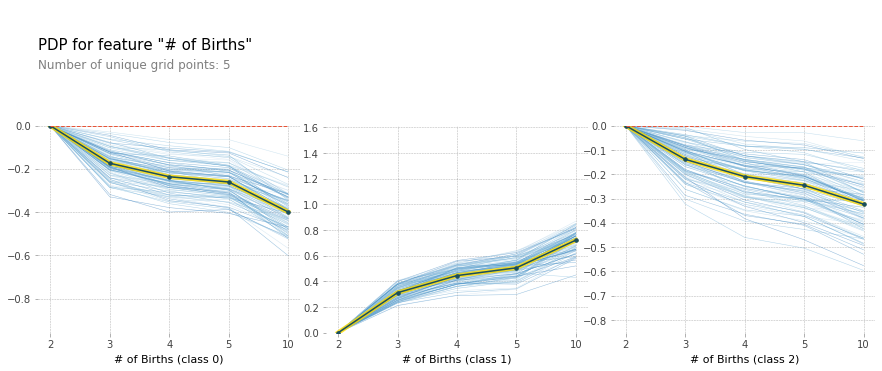

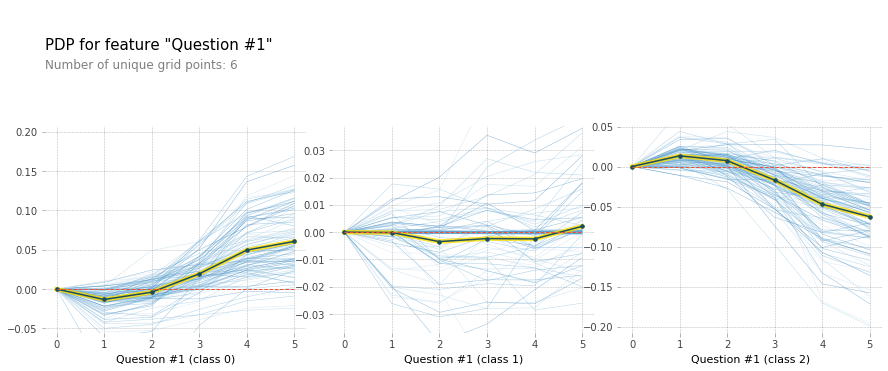

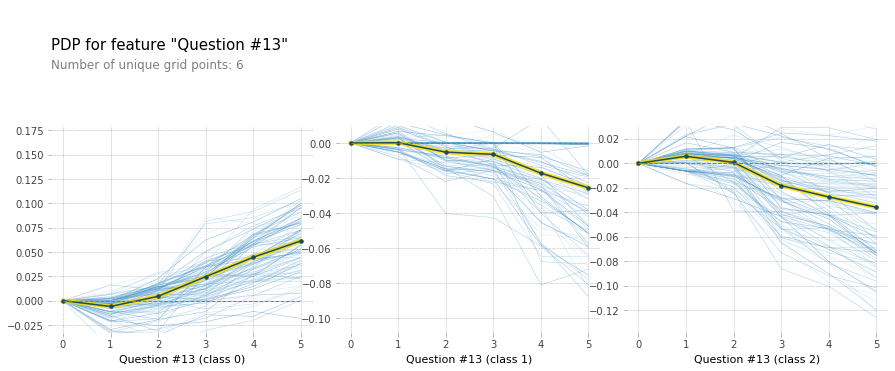

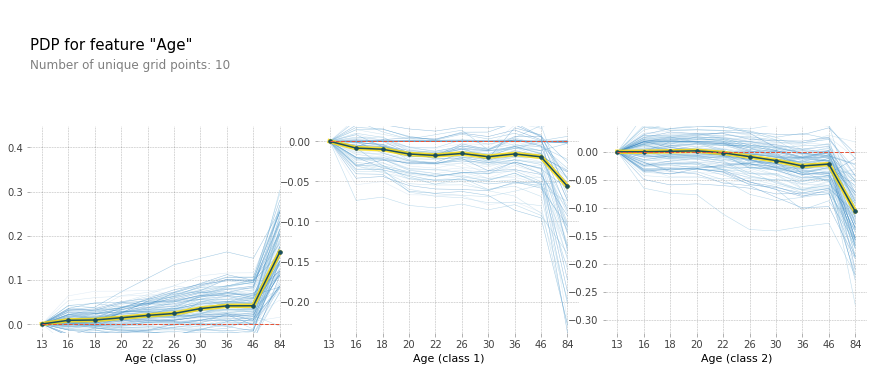

In [32]:
for i in range(len(feature_names)):
    pdp_feat_df = pdp.pdp_isolate(\
                                 model=class_models['gradient_boosting']['fitted'],\
                                  dataset=pd.concat((X_test, y_test),axis=1),\
                                  model_features=X_test.columns,\
                                  feature=feature_names[i]
                                 )
    fig,axes = pdp.pdp_plot(
        pdp_isolate_out = pdp_feat_df,
        center=True,
        x_quantile=True,
        ncols=3,
        plot_lines=True,
        frac_to_plot=100,
        figsize=(15,6),
        feature_name=feature_labels[i]
    )

BirthnのPDPを見ると、出生数が増加するにつれて1番上の子と1番下の子の確率は一貫して下がっている。真ん中の子は増えていて、2人兄弟のときは真ん中の子は存在できないので０スタートになっている。細い線が太い線(平均)に一貫して近いため、強力な特徴量であり、全てのクラスの予測でほとんど変化がないことがわかる。

Q1のPDPは、「たくさん本を読んでるか」という設問。1番上の子では最初は減少し、その後上昇している。1番下の子は正反対の動きをしている。真ん中の子は観測地がばらついている。

Q13のPDPは「周りの人をリーダーにする」という設問。Q1での1番上の子のときと似たような動きをしているが、より顕著になっている。また、真ん中の子と1番下の子についてはQ1よりも小さい。

年齢のPDPでは、年齢が上がるにつれて、1番上の子はゆっくりと常に上昇している。16歳から22歳のメモリでは少ししか離れていないが、後半で急激に上昇していて、これは年齢の分布が歪んでいることを示している。

年齢と兄弟の人数の分布が歪んている場合があるので、それを調べてみる。もしそれが歪んでいる場合、AgeのPDPが右に歪んでいる説明がつく。

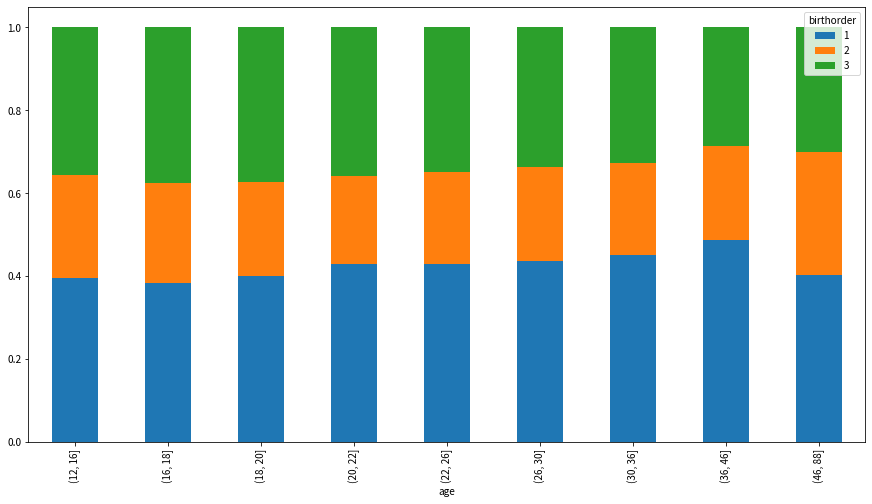

In [37]:
birthorder_abbrev_df = df[['age', 'birthorder']]
birthorder_abbrev_df.set_index(pd.cut(\
                                  birthorder_abbrev_df['age'],\
                                  [12, 16, 18, 20, 22, 26, 30,\
                                   36, 46, 88]), inplace=True)
agegroup_birthorder_counts_s = birthorder_abbrev_df.\
                            groupby([birthorder_abbrev_df.index,\
                                     'birthorder']).size()
agegroup_counts_s = birthorder_abbrev_df.groupby(\
                                            birthorder_abbrev_df.index)\
                                            ['birthorder'].count()
agegroup_pct_birthorder_s = agegroup_birthorder_counts_s.div(\
                                                    agegroup_counts_s,\
                                                     axis=0,level=0)
agegroup_pct_birthorder_s.unstack().plot.bar(stacked=True,\
                                         figsize=(15,8))


各クラスがさまざまな年齢層での割合を示している。それほど多くはないように見えるが、16際から46歳までのクラス1の割合が38%から49%まであがっている。一方クラス２の変動はわずか３%だった。また、統計からこれらの年齢層にまたがる75年間で家族当たりの平均の子供の人数は、少なくても２人減っていて、75年間のうち最後の50年間ではほぼ１人減っていることがわかっている。年齢があがるにつれて、1番上の子である確率は低くなるはずで、真ん中の子の確率があがるはず。なのにそうなっていないのはなぜか。

尤もらしい仮説は、1番上の子はオンラインクイズに参加する傾向が強くなっているため、高年齢層が多くいて、そのバイアスをモデルが拾ってしまったということ。これについては後の章で触れる。